In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("/content/ADANIPORTS.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
print("Initial Data:")
print(df.head())

Initial Data:
        Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0 2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1 2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2 2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3 2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4 2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.

In [16]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Series              3322 non-null   object        
 3   Prev Close          3322 non-null   float64       
 4   Open                3322 non-null   float64       
 5   High                3322 non-null   float64       
 6   Low                 3322 non-null   float64       
 7   Last                3322 non-null   float64       
 8   Close               3322 non-null   float64       
 9   VWAP                3322 non-null   float64       
 10  Volume              3322 non-null   int64         
 11  Turnover            3322 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  3322 non-null

In [17]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                                Date   Prev Close         Open         High  \
count                           3322  3322.000000  3322.000000  3322.000000   
mean   2014-08-14 03:47:08.416616448   344.114314   344.763019   351.608007   
min              2007-11-27 00:00:00   108.000000   108.000000   110.450000   
25%              2011-04-07 06:00:00   164.312500   164.850000   168.000000   
50%              2014-08-06 12:00:00   324.700000   325.750000   331.275000   
75%              2017-12-18 18:00:00   400.912500   401.000000   407.187500   
max              2021-04-30 00:00:00  1307.450000  1310.250000  1324.000000   
std                              NaN   192.936882   193.619992   198.617808   

               Low         Last        Close         VWAP        Volume  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3.322000e+03   
mean    337.531969   344.239539   344.201626   344.853182  2.954564e+06   
min     105.650000   108.000000   108.000

In [18]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64


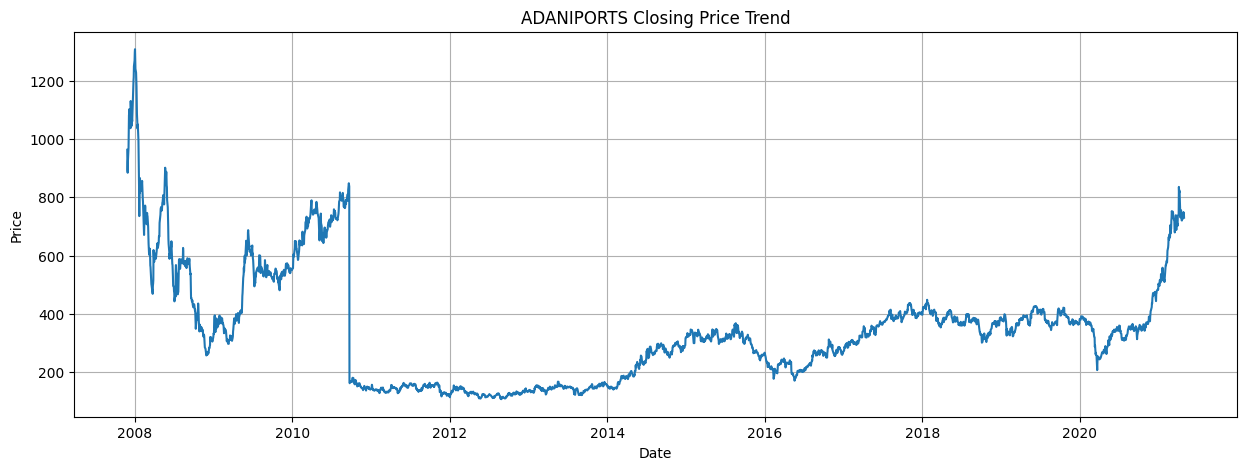

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['Close'])
plt.title('ADANIPORTS Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [20]:
def add_technical_indicators(df):
    df['SMA_5'] = df['Close'].rolling(window=5).mean()
    df['SMA_10'] = df['Close'].rolling(window=10).mean()
    df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
    df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['Momentum_5'] = df['Close'] - df['Close'].shift(5)
    df['ROC_5'] = df['Close'].pct_change(periods=5)
    df['BB_Middle'] = df['Close'].rolling(window=20).mean()
    df['BB_Std'] = df['Close'].rolling(window=20).std()
    df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_Std']
    df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_Std']
    delta = df['Close'].diff()
    gain = delta.clip(lower=0).rolling(window=14).mean()
    loss = -delta.clip(upper=0).rolling(window=14).mean()
    RS = gain / loss
    df['RSI_14'] = 100 - (100 / (1 + RS))
    return df

In [21]:
df = add_technical_indicators(df)
df = df.dropna()
print("\nData after adding technical indicators:")
print(df[["Close", "SMA_5", "EMA_5", "Momentum_5", "RSI_14"]].head())


Data after adding technical indicators:
      Close   SMA_5       EMA_5  Momentum_5     RSI_14
866  164.00  157.12  158.460020        9.55  85.159817
867  161.25  158.99  159.390013        9.35  77.737665
868  161.05  160.67  159.943342        8.40  77.090909
869  159.85  161.52  159.912228        4.25  71.020408
870  157.25  160.68  159.024819       -4.20  62.780899


In [22]:
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

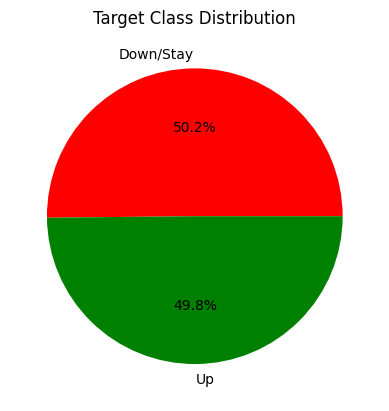

In [23]:
# Pie chart of class balance
plt.pie(df['target'].value_counts(), labels=['Down/Stay', 'Up'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Target Class Distribution')
plt.show()

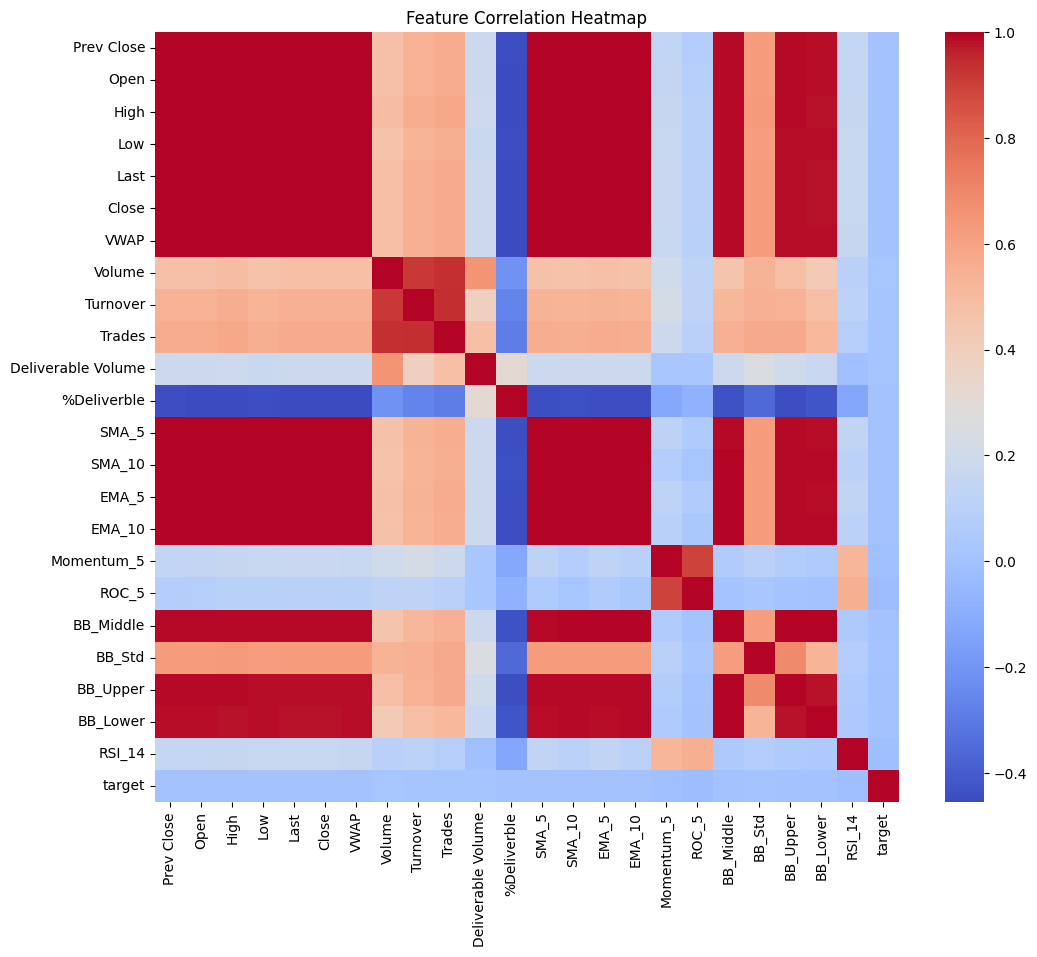

In [24]:
#correlation heatmap
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()
sb.heatmap(correlation, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

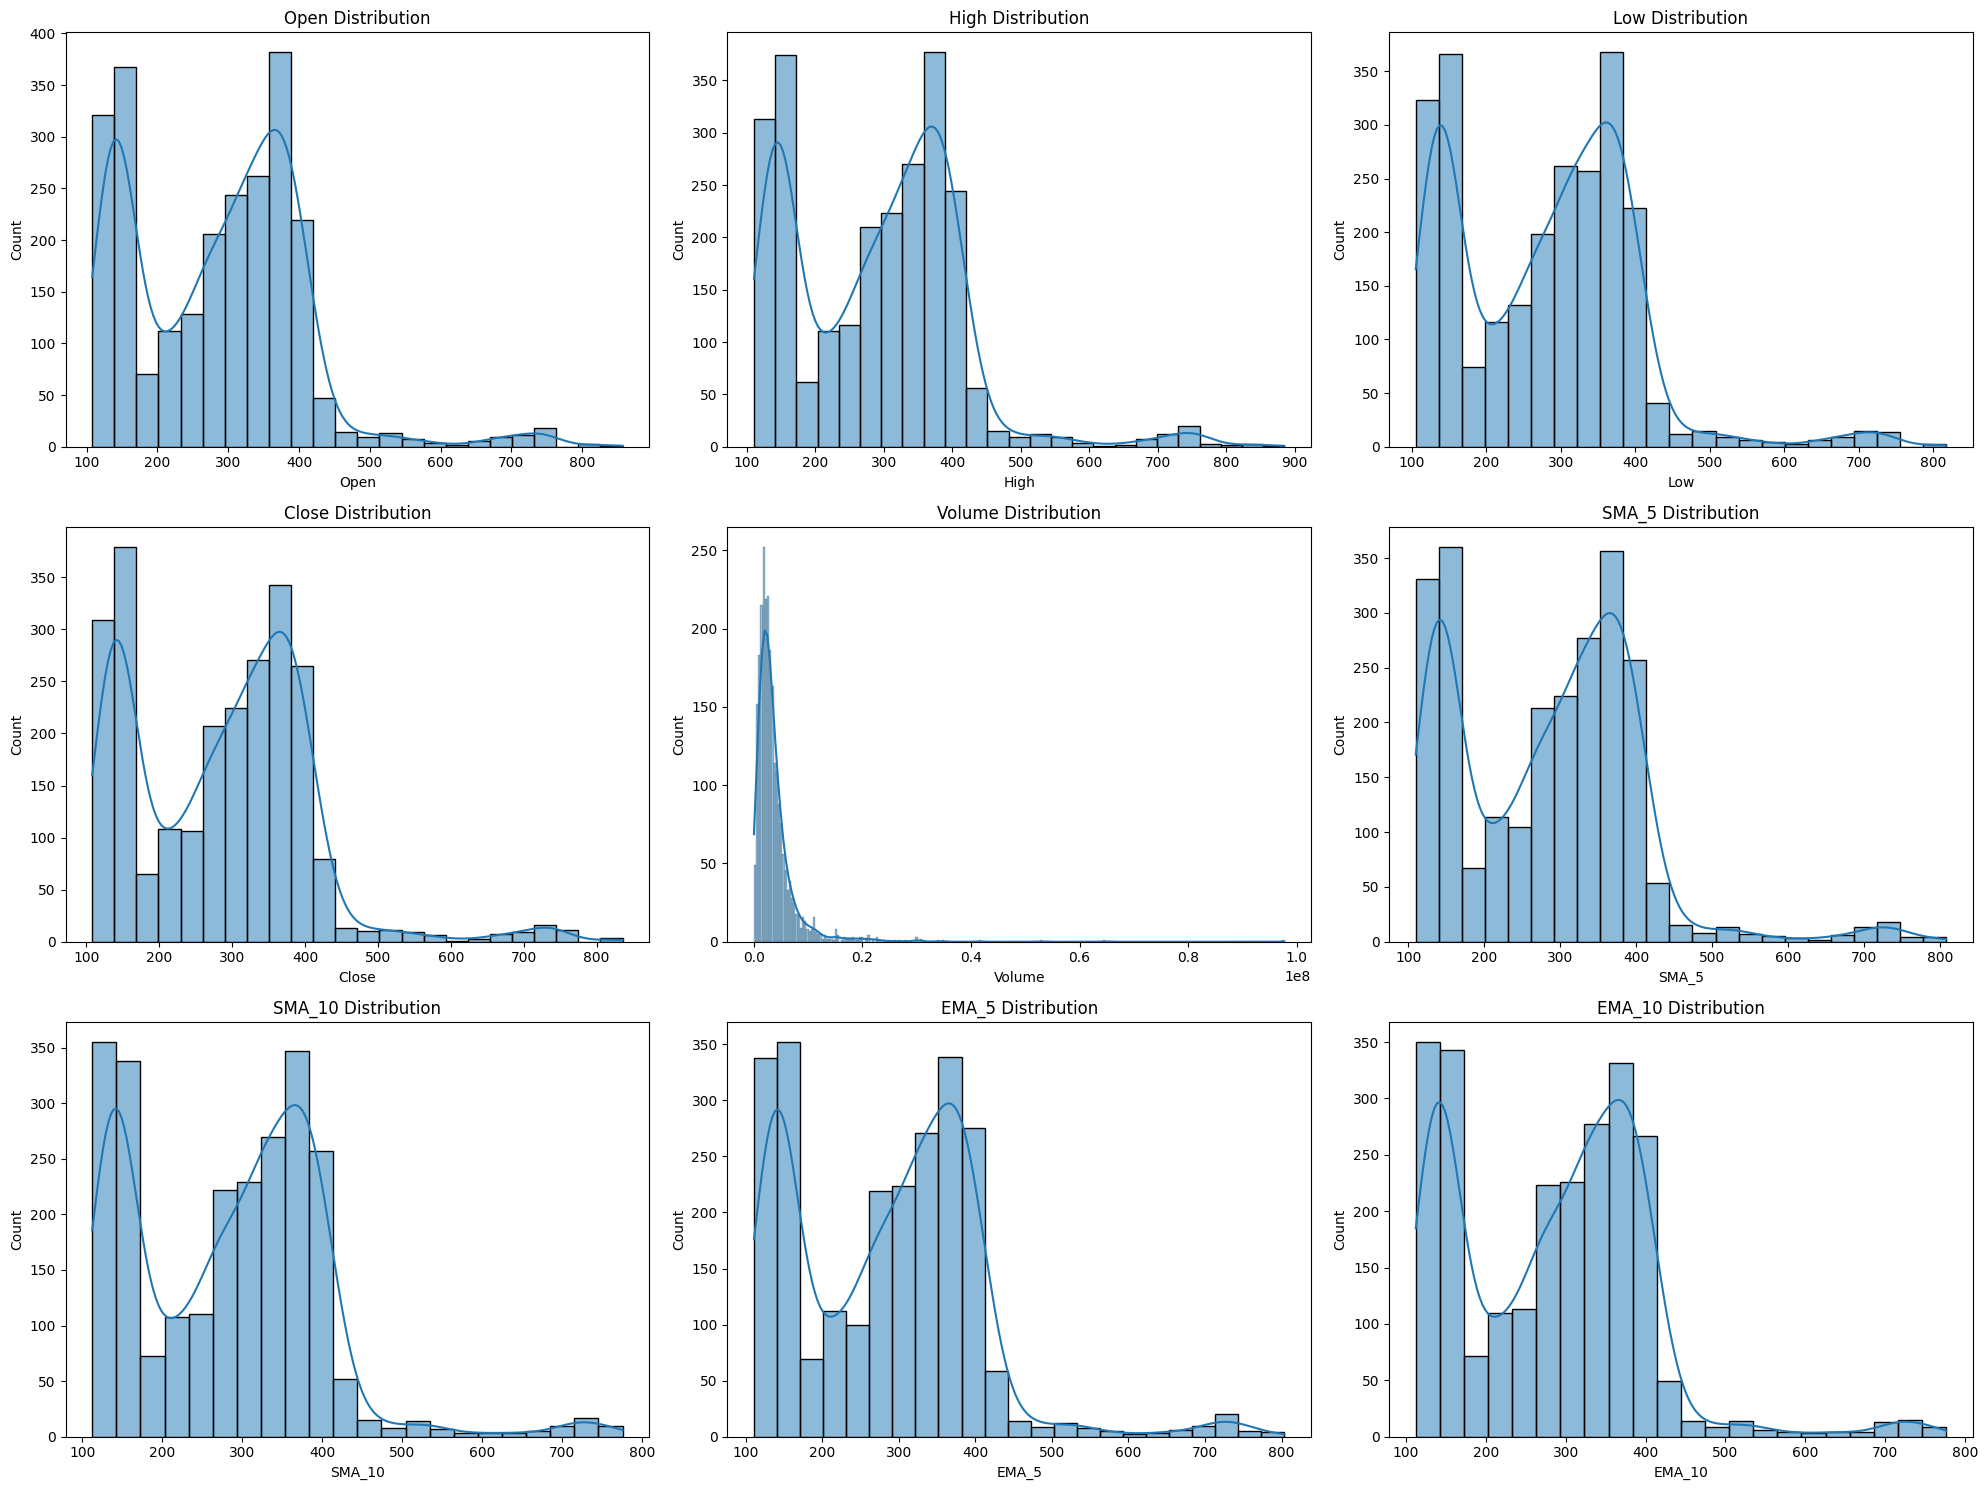

In [25]:
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume',
                'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10',
                'Momentum_5', 'ROC_5', 'BB_Upper', 'BB_Lower', 'RSI_14']
plt.figure(figsize=(20, 15))
for i, col in enumerate(feature_cols[:9]):
    plt.subplot(3, 3, i + 1)
    sb.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

In [27]:
X = df[feature_cols]
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, test_size=0.1, random_state=42, shuffle=False)
print("\nShapes - X_train:", X_train.shape, ", X_valid:", X_valid.shape)



Shapes - X_train: (2210, 14) , X_valid: (246, 14)


In [29]:
model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [30]:
train_roc = metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
valid_roc = metrics.roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
print(f"\nTrain ROC AUC: {train_roc:.4f}")
print(f"Validation ROC AUC: {valid_roc:.4f}")


Train ROC AUC: 0.9557
Validation ROC AUC: 0.5248


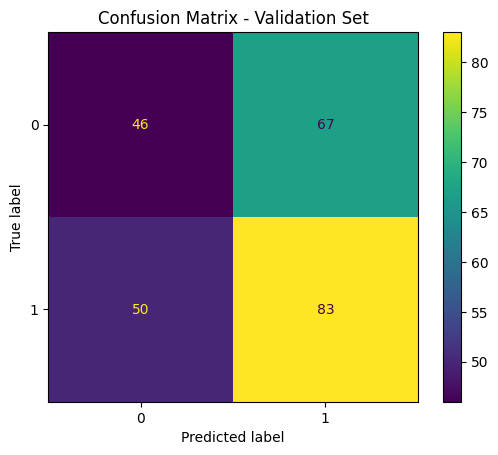

In [31]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid)
plt.title("Confusion Matrix - Validation Set")
plt.show()